<a href="https://colab.research.google.com/github/MahyarFardin/Neural-Networks/blob/neural-network/project/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

In [ ]:
!unzip /content/gdrive/MyDrive/GdriveXbot/archive.zip -d /content/gdrive/MyDrive/temp

In [5]:
import os
import shutil
import numpy as np
import pandas as pd
from matplotlib.image import imread
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

In [12]:
for x in os.listdir("/content/gdrive/MyDrive/temp/chest_xray/test"):
  print(x+": "+str(len(os.listdir(os.path.join("/content/gdrive/MyDrive/temp/chest_xray/test",x)))))

NORMAL: 234
PNEUMONIA: 390


In [13]:
for x in os.listdir("/content/gdrive/MyDrive/temp/chest_xray/train"):
  print(x+": "+str(len(os.listdir(os.path.join("/content/gdrive/MyDrive/temp/chest_xray/train",x)))))

NORMAL: 1341
PNEUMONIA: 3875


In [14]:
for x in os.listdir("/content/gdrive/MyDrive/temp/chest_xray/val"):
  print(x+": "+str(len(os.listdir(os.path.join("/content/gdrive/MyDrive/temp/chest_xray/val",x)))))

NORMAL: 8
PNEUMONIA: 8


In [64]:
metadata=pd.read_csv("/content/covid-chestxray-dataset/metadata.csv")

In [22]:
len(os.listdir("/content/covid-chestxray-dataset/images"))

930

In [65]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [66]:
metadata["finding"].unique()

array(['Pneumonia/Viral/COVID-19', 'Pneumonia', 'Pneumonia/Viral/SARS',
       'Pneumonia/Fungal/Pneumocystis',
       'Pneumonia/Bacterial/Streptococcus', 'No Finding',
       'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli',
       'Pneumonia/Bacterial/Klebsiella', 'Pneumonia/Bacterial/Legionella',
       'Unknown', 'Pneumonia/Lipoid', 'Pneumonia/Viral/Varicella',
       'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Mycoplasma',
       'Pneumonia/Viral/Influenza', 'todo', 'Tuberculosis',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Fungal/Aspergillosis',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Aspiration',
       'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Viral/MERS-CoV',
       'Pneumonia/Bacterial/Staphylococcus/MRSA'], dtype=object)

In [67]:
metadata=metadata.drop(metadata[metadata["finding"].str.contains("No Finding")].index)
metadata=metadata.drop(metadata[metadata["finding"].str.contains("Unknown")].index)
metadata=metadata.drop(metadata[metadata["finding"].str.contains("todo")].index)

In [73]:
metadata=metadata.reset_index()

In [75]:
metadata.loc[8]["finding"]

'Pneumonia/Viral/COVID-19'

In [80]:
for i in range(len(metadata)):
  try:
    if(metadata.loc[i]["finding"]=="Pneumonia/Viral/COVID-19"):
      shutil.copyfile(os.path.join("/content/covid-chestxray-dataset/images",metadata.loc[i]["filename"]),os.path.join("/content/data/covid",metadata.loc[i]["filename"]))
    else:
      shutil.copyfile(os.path.join("/content/covid-chestxray-dataset/images",metadata.loc[i]["filename"]),os.path.join("/content/data/non-covid",metadata.loc[i]["filename"]))
  except:
    print(metadata.loc[i]["filename"])

radiopaedia_org_covid-19-pneumonia-7_85703_0-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-14_85914_0-dcm.nii.gz
coronacases_org_001.nii.gz
coronacases_org_002.nii.gz
coronacases_org_003.nii.gz
coronacases_org_004.nii.gz
coronacases_org_005.nii.gz
coronacases_org_006.nii.gz
coronacases_org_007.nii.gz
coronacases_org_008.nii.gz
coronacases_org_009.nii.gz
coronacases_org_010.nii.gz
radiopaedia_org_covid-19-pneumonia-4_85506_1-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-29_86490_1-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-29_86491_1-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-23_86359_0-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-10_85902_1-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-36_86526_0-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-27_86410_0-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-40_86625_0-dcm.nii.gz


In [ ]:
root="/content/gdrive/MyDrive/data/chest_xray/val"

for x in os.listdir(root):
  if(x=="PNEUMONIA"):
    for y in os.listdir(os.path.join(root,x)):
      shutil.copyfile(os.path.join(root,"PNEUMONIA",y),os.path.join("/content/data/non_cov",y))

In [ ]:
shutil.rmtree("/content/gdrive/MyDrive/data")

In [ ]:
img_dir="/content/covid-chestxray-dataset/images"

In [ ]:
len(os.listdir(img_dir))

930

In [ ]:
for subdir in os.listdir(testDir):
  print(subdir+": "+str(len(os.path.join(testDir, subdir))))

COVID19: 46
NORMAL: 45
PNEUMONIA: 48


In [ ]:
imagesInfo=[[],[],[]]

for subdir in os.listdir(trainDir):
  for image in os.listdir(os.path.join(trainDir, subdir)):
    img=Image.open(os.path.join(trainDir, subdir, image))
    imagesInfo[0].append(img.size[0])
    imagesInfo[1].append(img.size[1])
    imagesInfo[2].append(img.mode)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'number of vertical pixels')

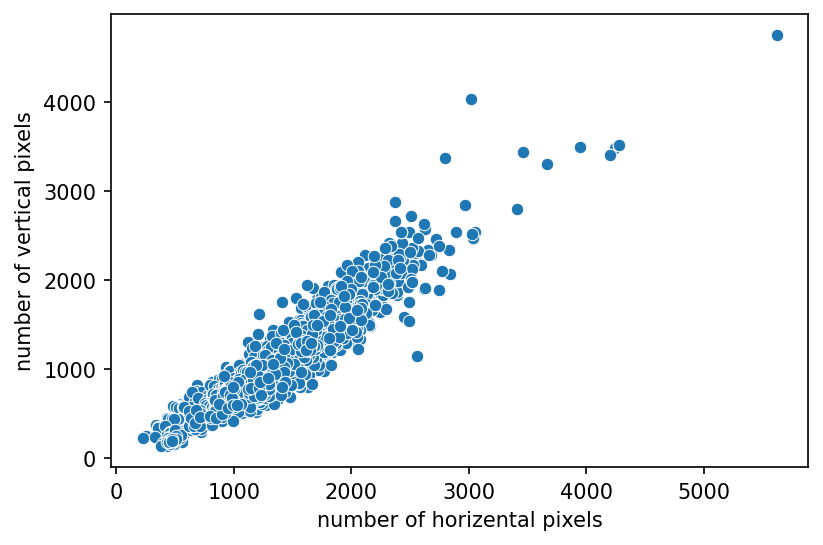

In [ ]:
sns.scatterplot(imagesInfo[0],imagesInfo[1])
plt.xlabel("number of horizental pixels")
plt.ylabel("number of vertical pixels")

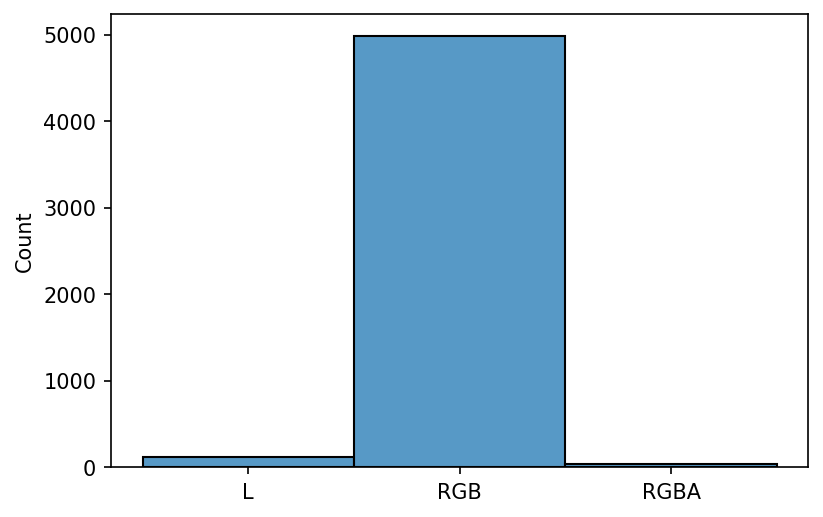

In [ ]:
sns.histplot(imagesInfo[2])